In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
rd = pd.read_csv(r'../data/Emission.csv',parse_dates=['Year-Month'], index_col='Year-Month'); rd.head()

,CO2 Emission
Year-Month,
1973-01-01,106.363
1973-02-01,101.760
1973-03-01,110.553
1973-04-01,104.734
1973-05-01,114.897


In [3]:
rd.describe()

,CO2 Emission
count,486.000000
mean,136.958300
std,19.856571
min,94.699000
25%,118.778500
50%,135.994000
75%,154.219500
max,179.659000


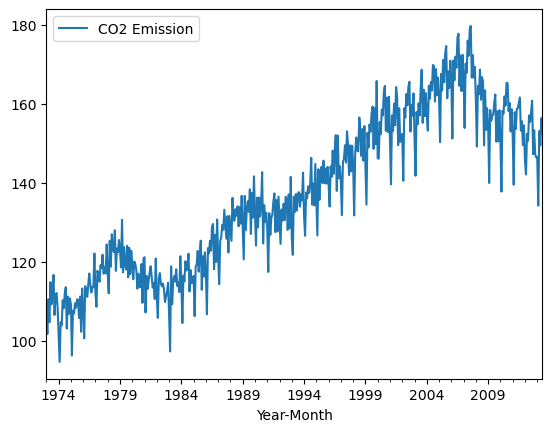

In [4]:
rd.plot(); plt.show()

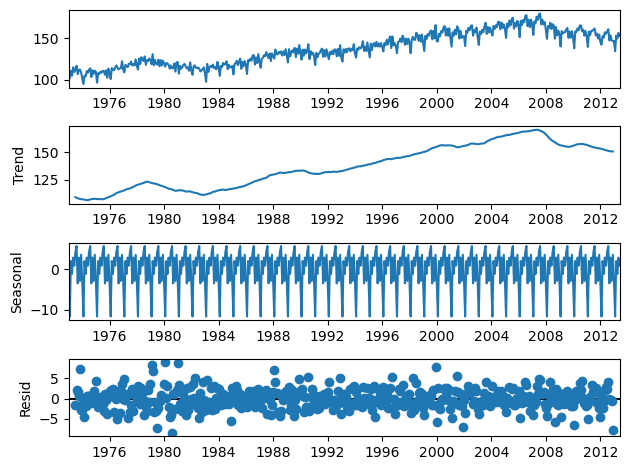

In [5]:
df_add_dcmps = seasonal_decompose(rd, model='additive')
df_add_dcmps.plot(); plt.show()

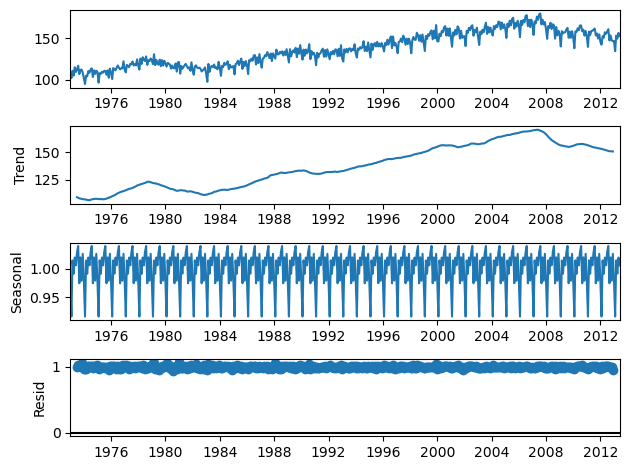

In [6]:
df_mult_dcmps = seasonal_decompose(rd, model='multiplicative')
df_mult_dcmps.plot(); plt.show()

In [7]:
train = rd[0:int(len(rd)*0.7)]
test = rd[int(len(rd)*0.7):]

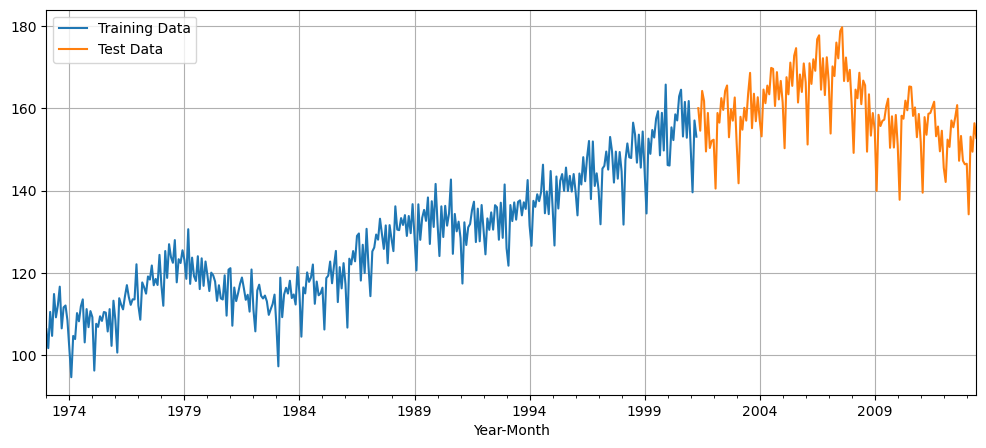

In [8]:
fig, axes = plt.subplots(1,1,figsize=(12,5))

train['CO2 Emission'].plot(fontsize=10)
test['CO2 Emission'].plot(fontsize=10)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Naive Model

In [9]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [10]:
NaiveModel_test['naive'] = np.asarray(train['CO2 Emission'])[len(np.asarray(train['CO2 Emission']))-1]
NaiveModel_test['naive'].head()

Year-Month
2001-05-01    153.091
2001-06-01    153.091
2001-07-01    153.091
2001-08-01    153.091
2001-09-01    153.091
Name: naive, dtype: float64

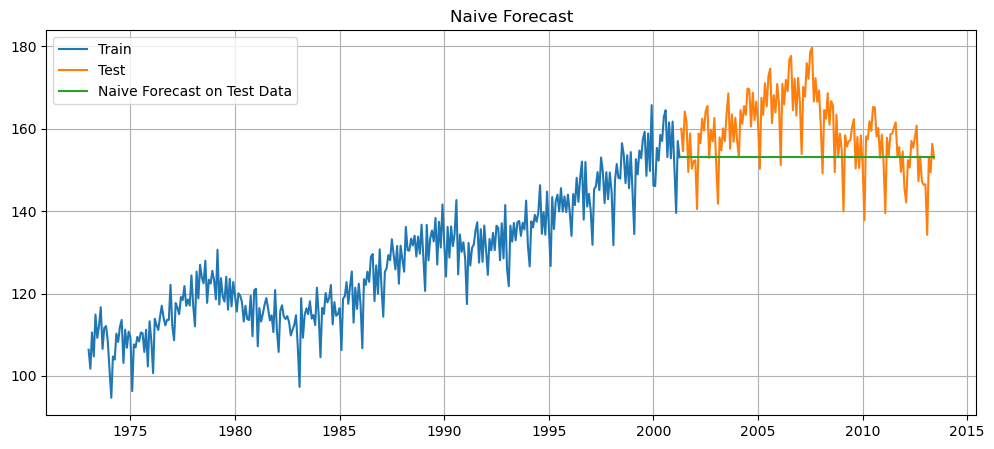

In [11]:
fig, axes = plt.subplots(1,1,figsize=(12,5))
plt.plot(NaiveModel_train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid(); plt.show()

In [12]:
rmse_model2_test = metrics.mean_squared_error(test['CO2 Emission'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 10.724


In [13]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

#resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
NaiveModel,10.723888


## Simple average

In [14]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [15]:
SimpleAverage_test['mean_forecast'] = train['CO2 Emission'].mean()
SimpleAverage_test['mean_forecast'].head()

Year-Month
2001-05-01    127.279197
2001-06-01    127.279197
2001-07-01    127.279197
2001-08-01    127.279197
2001-09-01    127.279197
Name: mean_forecast, dtype: float64

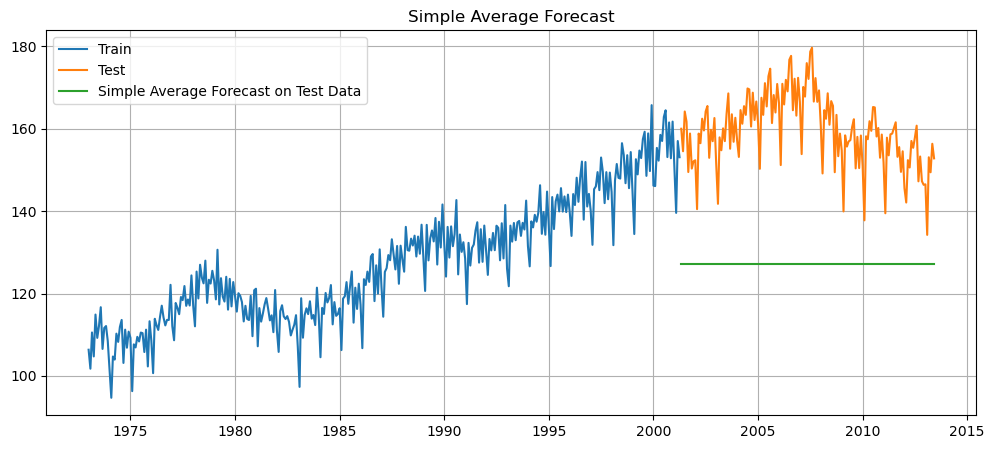

In [16]:
fig, axes = plt.subplots(1,1,figsize=(12,5))
plt.plot(SimpleAverage_train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid(); plt.show()

In [17]:
rmse_model2_test = metrics.mean_squared_error(test['CO2 Emission'],SimpleAverage_test['mean_forecast'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 33.347


In [18]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['SimpleAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
NaiveModel,10.723888
SimpleAverage,33.347240


## Moving Average

In [20]:
MovingAverage = rd.copy()

In [22]:
MovingAverage['Trailing_2'] = MovingAverage['CO2 Emission'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['CO2 Emission'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['CO2 Emission'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['CO2 Emission'].rolling(9).mean()
MovingAverage.head(10)

,CO2 Emission,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Year-Month,,,,,
1973-01-01,106.363,NaN,NaN,NaN,NaN
1973-02-01,101.760,104.0615,NaN,NaN,NaN
1973-03-01,110.553,106.1565,NaN,NaN,NaN
1973-04-01,104.734,107.6435,105.85250,NaN,NaN
1973-05-01,114.897,109.8155,107.98600,NaN,NaN
1973-06-01,109.240,112.0685,109.85600,107.924500,NaN
1973-07-01,112.139,110.6895,110.25250,108.887167,NaN
1973-08-01,116.683,114.4110,113.23975,111.374333,NaN
1973-09-01,106.558,111.6205,111.15500,110.708500,109.214111


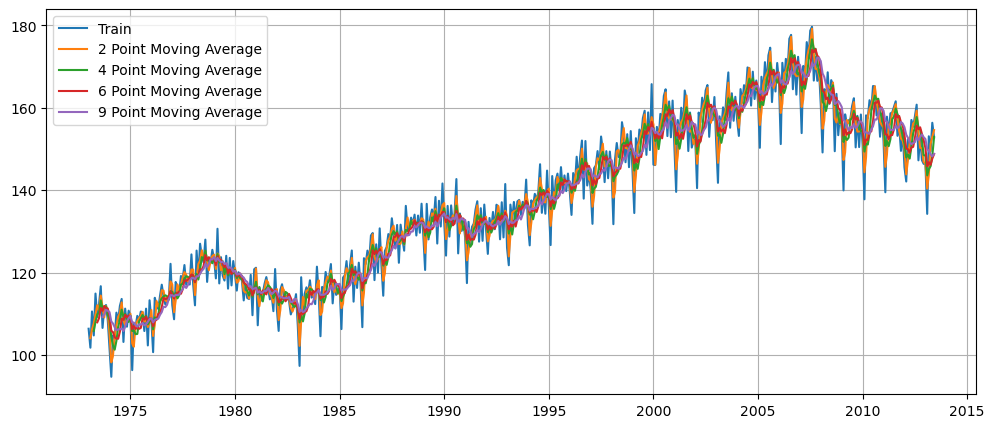

In [26]:
## Plotting on the whole data
fig, axes = plt.subplots(1,1,figsize=(12,5))
plt.plot(MovingAverage['CO2 Emission'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid(); plt.show()

In [27]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

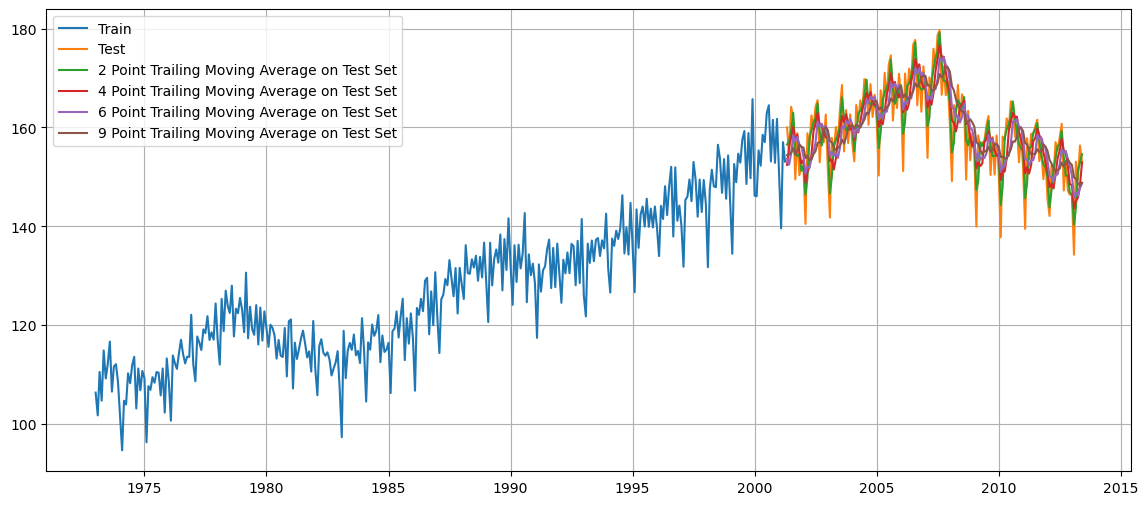

In [29]:
plt.figure(figsize=(14,6))
plt.plot(trailing_MovingAverage_train['CO2 Emission'], label='Train')
plt.plot(trailing_MovingAverage_test['CO2 Emission'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid(); plt.show()

In [30]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['CO2 Emission'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.200
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 5.243
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 5.902
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 6.573


In [31]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
NaiveModel,10.723888
SimpleAverage,33.347240
2pointTrailingMovingAverage,4.200082
4pointTrailingMovingAverage,5.242798
6pointTrailingMovingAverage,5.901887
9pointTrailingMovingAverage,6.573144


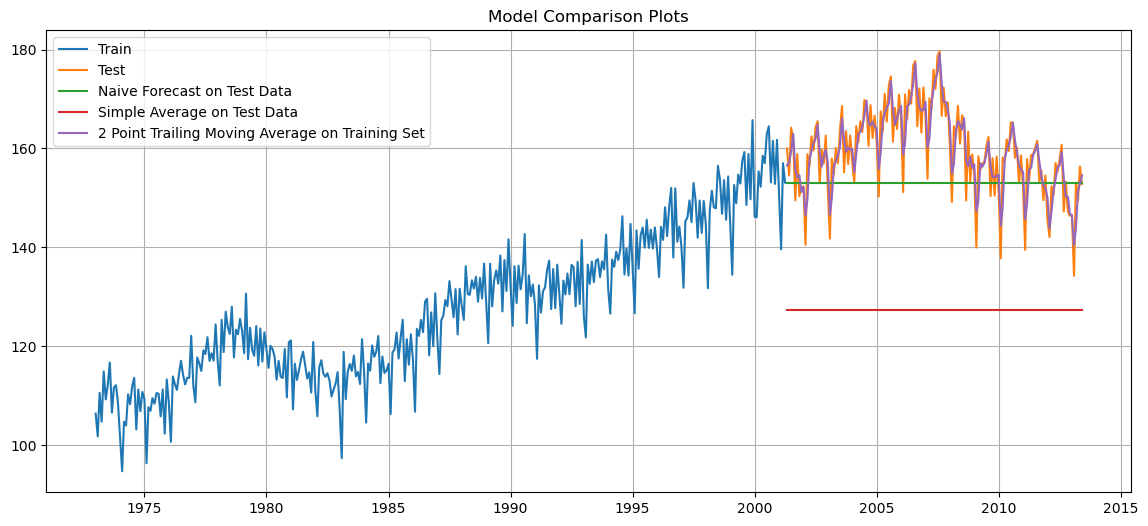

In [36]:
plt.figure(figsize=(14,6))
plt.plot(train['CO2 Emission'], label='Train')
plt.plot(test['CO2 Emission'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid(); plt.show()